In [10]:
from wordcloud import WordCloud
from collections import Counter
texts=[]
with open('D:/mycode/NLP/keyword/kr-wordrank/data/134963.txt', "r", encoding='utf-8') as infile:
    for line in infile:
        a,b=line.split('\t')
        texts.append(a)
import pandas as pd
from konlpy.tag import Okt
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
from krwordrank.word import summarize_with_keywords
import re
def regex(x):
    
    x=re.sub("\[.*\]|\s-\s.*",'',x)
    x=re.sub("\(.*\)|\s-\s.*",'',x)
    x=re.sub("\<.*\>|\s-\s.*",'',x)
    x=re.sub("\【.*\】|\s-\s.*",'',x)
    x= re.sub('[-=+#/\?:^$@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》,▷▶ⓒ]', '', x)
    
    return x

min_count = 5  
max_length = 100 
verbose =True
wordrank_extractor = KRWordRank(min_count, max_length , verbose=True)
beta = 0.85   
max_iter = 10
okt = Okt()
texts_re=[]
for i in texts:
    a=regex(str(i))
    texts_re.append(a)
keywords, rank, graph = wordrank_extractor.extract(texts_re, beta, max_iter)
keys=[]
ranks=[]
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True):
    o=okt.pos(str(word))
    if len([w[0] for w in o if w[1] !='Noun'])==0:
        keys.append(word)
        ranks.append(r)
    else:
        pass

scan vocabs ... 
num vocabs = 14595
done = 10 Early stopped.


In [21]:
tag=[]
for i,j in zip(keys,ranks):
    tag.append((i,int(j)))
dic=dict(tag[:50])
dic

{'영화': 187,
 '정말': 45,
 '마지막': 42,
 '음악': 39,
 '뮤지컬': 24,
 '진짜': 21,
 '최고': 21,
 '보고': 20,
 '아름': 20,
 '영상': 20,
 '사랑': 19,
 '노래': 18,
 '그냥': 17,
 '스토리': 16,
 '인생': 15,
 '현실': 15,
 '생각': 15,
 '다시': 14,
 '지루': 13,
 '감동': 12,
 '계속': 11,
 '재미': 11,
 '조금': 11,
 '장면': 11,
 '처음': 10,
 '결말': 10,
 '모두': 10,
 '연기': 9,
 '느낌': 9,
 '사람': 9,
 '라이언': 9,
 '올해': 9,
 '모든': 9,
 '재즈': 9,
 '기대': 9,
 '내내': 8,
 '연출': 8,
 '대한': 7,
 '배우': 7,
 '별로': 7,
 '평점': 7,
 '엔딩': 7,
 '가슴': 6,
 '라라': 6,
 '가장': 6,
 '엠마': 6,
 '한번': 6,
 '마음': 6,
 '내용': 6,
 '감독': 6}

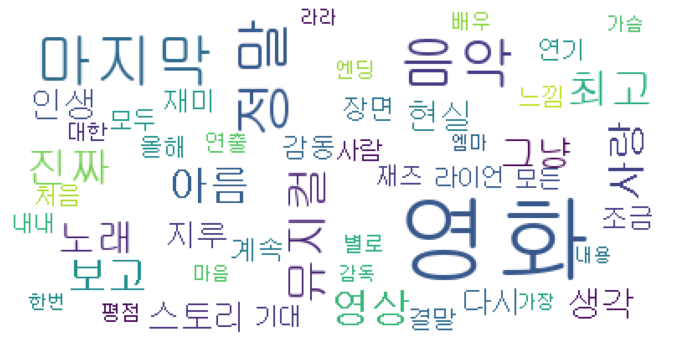

In [23]:
wc = WordCloud(font_path='D:/mycode/NLP/keyword/wordcloud/gulim.ttc',background_color="white", max_font_size=60)
cloud=wc.generate_from_frequencies(dic)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()